### Image Pre-Processing

This notebook preprocesses the Indiana University Chest X-ray Collection's image data. These are only frontal x-ray images. Things to consider during preprocessing this dataset is to normalize the images and also to get it ready to be ingested by the DenseNet121 architecture. This is the architecture that the larger CheXNet Dataset will be pre-trained on. The data that we are pre-processing now will be used for fine-tuning and validation. 

In [1]:
import os
import cv2
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

%matplotlib inline

Using TensorFlow backend.


In [4]:
def get_images(path = '../data/img_data/'):
    img_data_list = []
    all_img = os.listdir(path)
    ids = [('CXR'+re.findall(r'CXR(.*)_',i)[0]) for i in all_img]
    for img in all_img:
        img_path = path+img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        img_data_list.append(x/225)
    
    ids = [('CXR'+re.findall(r'CXR(.*)_',i)[0]) for i in all_img]
    img_data = np.array(img_data_list).reshape(len(img_data_list),224,224,3)
    return dict(zip(ids, img_data))

def write_image_dict(dict_, name):
    with open('../data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(dict_, f, pickle.HIGHEST_PROTOCOL)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


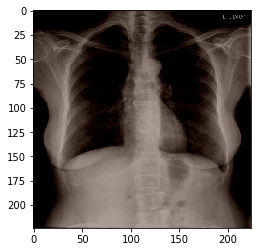

In [5]:
data = get_images()
img = data['CXR855'] 
plt.imshow(img)
write_image_dict(data, 'x_ray_processed')